In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data 
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
data = fetch_olivetti_faces()
X = data.images
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [4]:
X_train.shape

(280, 4096)

In [5]:
X_test.shape

(120, 4096)

In [6]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/olivetti.json")   
gc = GCForest(config)

In [7]:
# count class
len(np.unique(y_train))

40

In [8]:
     # X_enc is the concatenated predict_proba result of CascadeExtraTrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
     

[ 2018-07-30 17:57:17,951][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4096)],y_train.shape=(280,),X_groups_test.shape=[(120, 4096)],y_test.shape=(120,)
[ 2018-07-30 17:57:17,954][cascade_classifier.fit_transform] group_dims=[4096]
[ 2018-07-30 17:57:17,955][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 17:57:17,957][cascade_classifier.fit_transform] group_ends=[4096]
[ 2018-07-30 17:57:17,958][cascade_classifier.fit_transform] X_train.shape=(280, 4096),X_test.shape=(120, 4096)
[ 2018-07-30 17:57:17,962][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4096), X_cur_test.shape=(120, 4096)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[ 2018-07-30 17:57:18,555][kfold_wrapper.log_e

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 17:57:24,722][cascade_classifier.transform] X_groups_test.shape=[(120, 4096)]
[ 2018-07-30 17:57:24,725][cascade_classifier.transform] group_dims=[4096]
[ 2018-07-30 17:57:24,725][cascade_classifier.transform] X_test.shape=(120, 4096)
[ 2018-07-30 17:57:24,727][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4096)


Test Accuracy of CascadeExtraTrees = 91.666667 %
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 3 0 2]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.80      1.00      0.89         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       0.50      1.00      0.67         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
         15       1.00   

In [10]:
#  predict_proba result of ExtraTrees + data
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-30 17:57:25,778][cascade_classifier.transform] X_groups_test.shape=[(120, 4096)]
[ 2018-07-30 17:57:25,780][cascade_classifier.transform] group_dims=[4096]
[ 2018-07-30 17:57:25,781][cascade_classifier.transform] X_test.shape=(120, 4096)
[ 2018-07-30 17:57:25,783][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4096)


In [11]:
X_test_enc.shape

(120, 4136)

In [12]:
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [13]:
X_train_new.shape

(280, 4136)

In [14]:
# CascadeExtraTrees
config = load_json("./examples/olivettigc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-30 17:57:26,860][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4136)],y_train.shape=(280,),X_groups_test.shape=[(120, 4136)],y_test.shape=(120,)
[ 2018-07-30 17:57:26,865][cascade_classifier.fit_transform] group_dims=[4136]
[ 2018-07-30 17:57:26,866][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 17:57:26,867][cascade_classifier.fit_transform] group_ends=[4136]
[ 2018-07-30 17:57:26,868][cascade_classifier.fit_transform] X_train.shape=(280, 4136),X_test.shape=(120, 4136)
[ 2018-07-30 17:57:26,872][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4136), X_cur_test.shape=(120, 4136)
[ 2018-07-30 17:57:27,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 17:57:27,997][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:57:28,606][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - esti

In [15]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 17:57:52,258][cascade_classifier.transform] X_groups_test.shape=[(120, 4136)]
[ 2018-07-30 17:57:52,259][cascade_classifier.transform] group_dims=[4136]
[ 2018-07-30 17:57:52,261][cascade_classifier.transform] X_test.shape=(120, 4136)
[ 2018-07-30 17:57:52,262][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4136)


Test Accuracy of CascadeExtraTrees = 92.500000 %
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       0.50      1.00      0.67         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
         15       1.00   

In [16]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/olivettigc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-30 17:57:54,164][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4174)],y_train.shape=(280,),X_groups_test.shape=[(120, 4174)],y_test.shape=(120,)
[ 2018-07-30 17:57:54,166][cascade_classifier.fit_transform] group_dims=[4174]
[ 2018-07-30 17:57:54,166][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 17:57:54,167][cascade_classifier.fit_transform] group_ends=[4174]
[ 2018-07-30 17:57:54,168][cascade_classifier.fit_transform] X_train.shape=(280, 4174),X_test.shape=(120, 4174)
[ 2018-07-30 17:57:54,171][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4174), X_cur_test.shape=(120, 4174)
[ 2018-07-30 17:57:54,683][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 17:57:55,395][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:57:56,132][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - esti

[ 2018-07-30 17:58:20,180][cascade_classifier.transform] group_dims=[4174]
[ 2018-07-30 17:58:20,181][cascade_classifier.transform] X_test.shape=(120, 4174)
[ 2018-07-30 17:58:20,182][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4174)
[ 2018-07-30 17:58:22,391][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4212)],y_train.shape=(280,),X_groups_test.shape=[(120, 4212)],y_test.shape=(120,)
[ 2018-07-30 17:58:22,393][cascade_classifier.fit_transform] group_dims=[4212]
[ 2018-07-30 17:58:22,394][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 17:58:22,395][cascade_classifier.fit_transform] group_ends=[4212]
[ 2018-07-30 17:58:22,396][cascade_classifier.fit_transform] X_train.shape=(280, 4212),X_test.shape=(120, 4212)
[ 2018-07-30 17:58:22,400][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4212), X_cur_test.shape=(120, 4212)


('Test Accuracy of CascadeExtraTrees = 93.333333 %', 'Layer :', 0)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 17:58:23,270][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 17:58:24,279][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:58:25,017][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 17:58:25,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=83.87%
[ 2018-07-30 17:58:26,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 17:58:27,069][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 17:58:27,676][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=96.55%
[ 2018-07-30 17:58:28,283][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 17:58:49,489][cascade_classifier.fit_transform] X_train.shape=(280, 4250),X_test.shape=(120, 4250)
[ 2018-07-30 17:58:49,493][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4250), X_cur_test.shape=(120, 4250)


('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 1)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 17:58:50,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 17:58:50,612][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:58:51,217][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 17:58:51,943][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 17:58:52,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 17:58:53,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 17:58:54,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 17:58:54,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 17:59:17,435][cascade_classifier.fit_transform] X_train.shape=(280, 4288),X_test.shape=(120, 4288)
[ 2018-07-30 17:59:17,438][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4288), X_cur_test.shape=(120, 4288)


('Test Accuracy of CascadeExtraTrees = 92.500000 %', 'Layer :', 2)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       0.50      1.00      0.67         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 17:59:17,965][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 17:59:18,570][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:59:19,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 17:59:19,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=83.87%
[ 2018-07-30 17:59:20,628][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 17:59:21,360][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 17:59:22,080][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 17:59:22,683][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 17:59:47,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 17:59:48,163][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 17:59:48,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 17:59:49,491][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 17:59:49,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.50%
[ 2018-07-30 17:59:49,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=92.50%
[ 2018-07-30 17:59:49,713][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.50%
[ 2018-07-30 17:59:49,713][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=92.50%
[ 2018-07-30 17:59:49,714]

('Test Accuracy of CascadeExtraTrees = 93.333333 %', 'Layer :', 3)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 17:59:52,798][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 17:59:53,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 17:59:54,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 17:59:55,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 17:59:56,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 17:59:57,308][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 17:59:58,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 17:59:59,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:00:27,017][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 18:00:27,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-30 18:00:28,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:00:28,836][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:00:28,942][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.50%
[ 2018-07-30 18:00:28,943][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=93.33%
[ 2018-07-30 18:00:28,944][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.50%
[ 2018-07-30 18:00:28,945][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=93.33%
[ 2018-07-30 18:00:28,946][

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 4)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:00:31,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:00:32,564][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:00:33,163][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 18:00:33,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:00:34,385][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=83.87%
[ 2018-07-30 18:00:34,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:00:35,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:00:36,559][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:01:03,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 18:01:03,903][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=92.86%
[ 2018-07-30 18:01:04,546][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:01:05,152][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=88.24%
[ 2018-07-30 18:01:05,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.86%
[ 2018-07-30 18:01:05,259][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=93.33%
[ 2018-07-30 18:01:05,260][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.86%
[ 2018-07-30 18:01:05,261][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=93.33%
[ 2018-07-30 18:01:05,264][

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 5)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:01:26,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:01:27,269][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:01:27,873][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:01:28,468][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:01:29,068][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:01:29,672][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 18:01:30,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:01:30,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:01:58,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.83%
[ 2018-07-30 18:01:59,038][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-30 18:01:59,643][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:02:00,335][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:02:00,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=91.79%
[ 2018-07-30 18:02:00,562][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=93.33%
[ 2018-07-30 18:02:00,563][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=91.79%
[ 2018-07-30 18:02:00,564][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=93.33%
[ 2018-07-30 18:02:00,567][

[ 2018-07-30 18:02:30,725][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=93.21%
[ 2018-07-30 18:02:30,726][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=94.17%
[ 2018-07-30 18:02:30,729][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(280, 4442), X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:02:31,242][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=84.38%
[ 2018-07-30 18:02:31,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=93.33%
[ 2018-07-30 18:02:32,461][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=92.86%
[ 2018-07-30 18:02:33,068][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=96.43%
[ 2018-07-30 18:02:33,666][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=96.43%
[ 

[ 2018-07-30 18:02:58,862][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:00,267][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:01,437][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:02,482][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:03,673][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:04,723][cascade_classifier.transform] [layer=6] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:05,777][cascade_classifier.transform] [layer=7] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:06,823][cascade_classifier.transform] [layer=8] look_indexs=[0], X_cur_test.shape=(120, 4442)
[ 2018-07-30 18:03:07,878][cascade_classifier.transform] [layer=9] look_indexs=[0], X_cur_test.s

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 6)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:03:09,461][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:03:10,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:03:10,791][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 18:03:11,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:03:12,000][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:03:12,605][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:03:13,247][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:03:13,858][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:03:37,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.83%
[ 2018-07-30 18:03:38,530][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:03:39,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:03:39,743][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:03:39,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.50%
[ 2018-07-30 18:03:39,849][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:03:39,850][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.50%
[ 2018-07-30 18:03:39,851][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:03:39,854]

('Test Accuracy of CascadeExtraTrees = 93.333333 %', 'Layer :', 7)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:03:49,755][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:03:50,359][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:03:50,958][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:03:51,565][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:03:52,173][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:03:52,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:03:53,522][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:03:54,134][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:04:18,986][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 18:04:19,597][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:04:20,207][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:04:21,102][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=88.24%
[ 2018-07-30 18:04:21,337][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.86%
[ 2018-07-30 18:04:21,338][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:04:21,339][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.86%
[ 2018-07-30 18:04:21,340][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:04:21,343]

('Test Accuracy of CascadeExtraTrees = 95.000000 %', 'Layer :', 8)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:04:32,450][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:04:33,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:04:33,661][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:04:34,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:04:34,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:04:35,528][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 18:04:36,135][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:04:36,752][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:05:05,036][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.83%
[ 2018-07-30 18:05:05,628][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:05:06,234][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:05:06,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:05:06,944][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.50%
[ 2018-07-30 18:05:06,945][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=95.00%
[ 2018-07-30 18:05:06,946][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.50%
[ 2018-07-30 18:05:06,947][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=95.00%
[ 2018-07-30 18:05:06,950]

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 9)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
       

[ 2018-07-30 18:05:16,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 18:05:17,565][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:05:18,269][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.00%
[ 2018-07-30 18:05:19,121][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:05:20,103][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:05:21,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 18:05:22,177][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 18:05:22,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.0

[ 2018-07-30 18:05:45,080][cascade_classifier.fit_transform] X_train.shape=(280, 4592),X_test.shape=(120, 4592)
[ 2018-07-30 18:05:45,082][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4592), X_cur_test.shape=(120, 4592)


('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 10)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:05:45,595][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:05:46,196][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:05:46,803][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:05:47,412][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:05:48,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:05:48,629][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.43%
[ 2018-07-30 18:05:49,236][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 18:05:49,965][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:06:12,704][cascade_classifier.fit_transform] X_train.shape=(280, 4630),X_test.shape=(120, 4630)
[ 2018-07-30 18:06:12,705][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4630), X_cur_test.shape=(120, 4630)


('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 11)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:06:13,216][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:06:13,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:06:14,703][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:06:15,825][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:06:16,953][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.32%
[ 2018-07-30 18:06:18,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:06:18,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 18:06:19,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:06:45,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.83%
[ 2018-07-30 18:06:45,692][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:06:46,282][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:06:46,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:06:47,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=91.43%
[ 2018-07-30 18:06:47,114][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:06:47,115][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=91.43%
[ 2018-07-30 18:06:47,116][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:06:47,117]

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 12)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:06:49,881][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:06:50,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:06:51,094][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:06:51,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=83.87%
[ 2018-07-30 18:06:52,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:06:53,916][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:06:55,054][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:06:55,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:07:27,233][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 18:07:27,844][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:07:28,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:07:29,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:07:29,166][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.14%
[ 2018-07-30 18:07:29,168][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:07:29,169][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.14%
[ 2018-07-30 18:07:29,169][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:07:29,170]

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 13)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:07:31,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.30%
[ 2018-07-30 18:07:32,404][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:07:33,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=80.00%
[ 2018-07-30 18:07:33,632][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:07:34,243][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.32%
[ 2018-07-30 18:07:34,850][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:07:35,617][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:07:36,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:08:01,751][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=87.50%
[ 2018-07-30 18:08:02,369][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-30 18:08:02,985][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:08:03,592][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=91.18%
[ 2018-07-30 18:08:03,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=91.43%
[ 2018-07-30 18:08:03,698][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:08:03,699][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=91.43%
[ 2018-07-30 18:08:03,700][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:08:03,702][

('Test Accuracy of CascadeExtraTrees = 93.333333 %', 'Layer :', 14)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       0.75      1.00      0.86         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:08:21,094][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:08:21,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:08:22,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:08:22,924][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:08:23,545][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.32%
[ 2018-07-30 18:08:24,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:08:24,764][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:08:25,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:08:49,590][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=95.83%
[ 2018-07-30 18:08:50,203][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=100.00%
[ 2018-07-30 18:08:50,811][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:08:51,418][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=85.29%
[ 2018-07-30 18:08:51,522][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=91.79%
[ 2018-07-30 18:08:51,523][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:08:51,524][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=91.79%
[ 2018-07-30 18:08:51,525][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:08:51,526]

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 15)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:08:54,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:08:54,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:08:55,483][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:08:56,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=80.65%
[ 2018-07-30 18:08:56,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:08:57,568][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:08:58,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 18:08:59,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:09:23,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=87.50%
[ 2018-07-30 18:09:24,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-30 18:09:25,110][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:09:25,723][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=88.24%
[ 2018-07-30 18:09:25,829][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=91.07%
[ 2018-07-30 18:09:25,830][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:09:25,831][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=91.07%
[ 2018-07-30 18:09:25,832][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:09:25,835][

[ 2018-07-30 18:09:51,075][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=92.50%
[ 2018-07-30 18:09:51,076][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=94.17%
[ 2018-07-30 18:09:51,077][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=92.50%, accuracy_test=93.33%
[ 2018-07-30 18:09:51,082][cascade_classifier.transform] X_groups_test.shape=[(120, 4782)]
[ 2018-07-30 18:09:51,084][cascade_classifier.transform] group_dims=[4782]
[ 2018-07-30 18:09:51,084][cascade_classifier.transform] X_test.shape=(120, 4782)
[ 2018-07-30 18:09:51,086][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4782)
[ 2018-07-30 18:09:52,130][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(120, 4822)
[ 2018-07-30 18:09:53,175][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(120, 4822)
[ 2018-07-30 18:09:54,814][cascad

('Test Accuracy of CascadeExtraTrees = 93.333333 %', 'Layer :', 16)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:10:02,432][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-30 18:10:03,220][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:10:03,980][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:10:04,593][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.32%
[ 2018-07-30 18:10:05,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=87.10%
[ 2018-07-30 18:10:05,785][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:10:06,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-30 18:10:07,012][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.0

[ 2018-07-30 18:10:31,330][cascade_classifier.fit_transform] X_train.shape=(280, 4858),X_test.shape=(120, 4858)
[ 2018-07-30 18:10:31,333][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4858), X_cur_test.shape=(120, 4858)


('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 17)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:10:31,853][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=88.89%
[ 2018-07-30 18:10:32,578][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:10:33,186][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:10:33,903][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:10:34,522][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.32%
[ 2018-07-30 18:10:35,137][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:10:35,745][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:10:36,470][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:11:01,071][cascade_classifier.fit_transform] X_train.shape=(280, 4896),X_test.shape=(120, 4896)
[ 2018-07-30 18:11:01,075][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4896), X_cur_test.shape=(120, 4896)


('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 18)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

[ 2018-07-30 18:11:01,591][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=92.59%
[ 2018-07-30 18:11:02,198][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-30 18:11:02,814][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.00%
[ 2018-07-30 18:11:03,418][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=87.10%
[ 2018-07-30 18:11:04,020][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.32%
[ 2018-07-30 18:11:04,627][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=92.86%
[ 2018-07-30 18:11:05,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-30 18:11:05,841][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=100.00

[ 2018-07-30 18:11:31,431][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=91.67%
[ 2018-07-30 18:11:32,044][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-30 18:11:32,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=92.31%
[ 2018-07-30 18:11:33,247][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=88.24%
[ 2018-07-30 18:11:33,453][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=92.14%
[ 2018-07-30 18:11:33,455][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=94.17%
[ 2018-07-30 18:11:33,456][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=92.14%
[ 2018-07-30 18:11:33,457][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=94.17%
[ 2018-07-30 18:11:33,458][

('Test Accuracy of CascadeExtraTrees = 94.166667 %', 'Layer :', 19)
[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 3 0 1]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 2]]


             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         4
          3       1.00      1.00      1.00         3
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
          8       1.00      1.00      1.00         3
          9       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         3
      

('Opt_Cascade_num =', 8, ' Accuracy =', 95.0, 'Time =', 363.64000000000004)


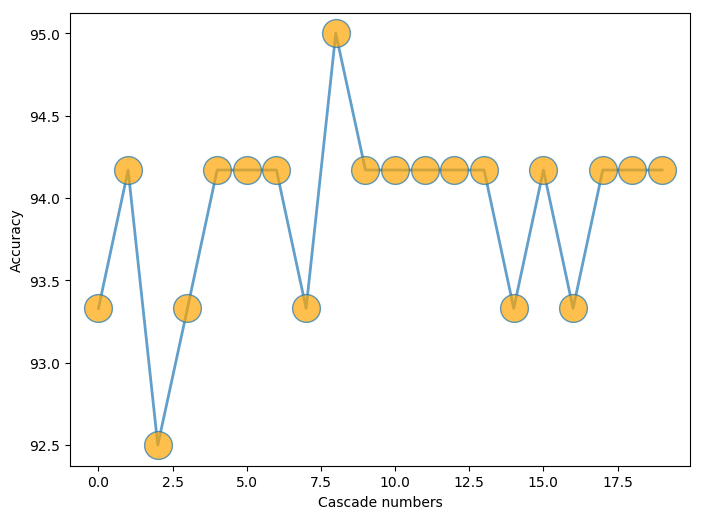

In [17]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [18]:
Accuracy

[93.33,
 94.17,
 92.5,
 93.33,
 94.17,
 94.17,
 94.17,
 93.33,
 95.0,
 94.17,
 94.17,
 94.17,
 94.17,
 94.17,
 93.33,
 94.17,
 93.33,
 94.17,
 94.17,
 94.17]